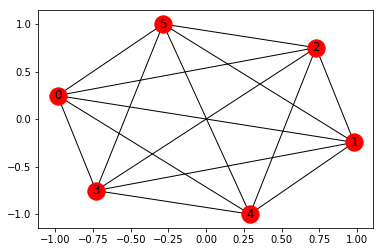

(0, 1), S = ()
[[0.46129221]]
(0, 2), S = ()
[[0.36477013]]
(0, 3), S = ()
[[0.00380559]]
(0, 4), S = ()
[[0.9796143]]


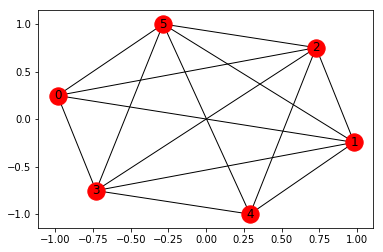

Removed 0, 4
(0, 5), S = ()
[[0.98524267]]


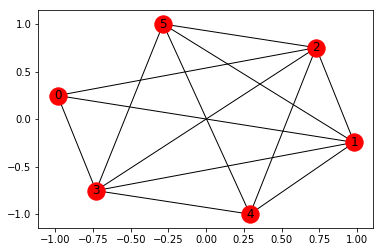

Removed 0, 5
(1, 0), S = ()
[[0.1887872]]
(1, 2), S = ()
[[0.74214825]]
(1, 3), S = ()
[[0.90535326]]


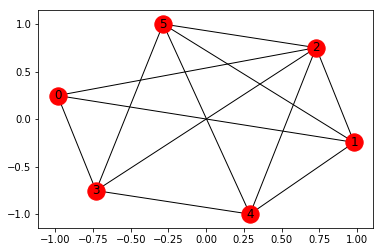

Removed 1, 3
(1, 4), S = ()
[[0.36551743]]
(1, 5), S = ()
[[0.5414956]]
(2, 0), S = ()
[[0.61088099]]
(2, 1), S = ()
[[0.08600144]]
(2, 3), S = ()
[[0.02945233]]
(2, 4), S = ()
[[0.70249431]]
(2, 5), S = ()
[[0.04783107]]
(3, 0), S = ()
[[0.52780576]]
(3, 2), S = ()
[[0.0535055]]
(3, 4), S = ()
[[0.68087582]]
(3, 5), S = ()
[[0.05115335]]
(4, 1), S = ()
[[0.00030651]]
(4, 2), S = ()
[[0.0890871]]
(4, 3), S = ()
[[0.40756837]]
(4, 5), S = ()
[[0.47279687]]
(5, 1), S = ()
[[0.81656901]]


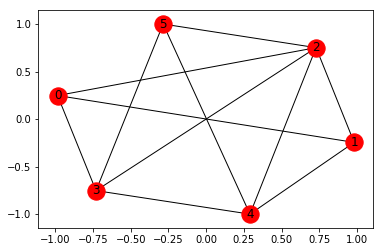

Removed 5, 1
(5, 2), S = ()
[[0.89871484]]


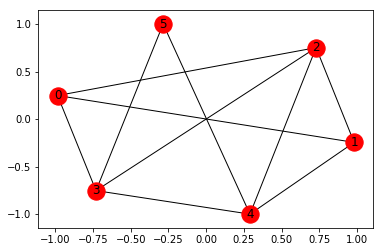

Removed 5, 2
(5, 3), S = ()
[[0.73284177]]
(5, 4), S = ()
[[0.48785072]]
(0, 1), S = (2,)
[[0.08785351]]
(0, 1), S = (3,)
[[0.89552351]]


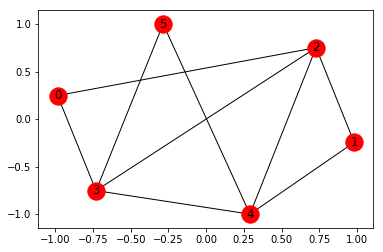

Removed 0, 1
(0, 2), S = (3,)
[[0.93545712]]


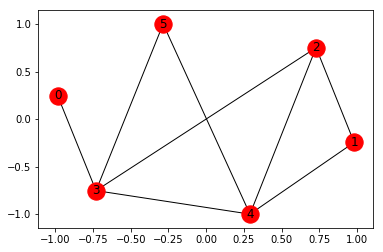

Removed 0, 2
(1, 2), S = (4,)
[[0.38220058]]
(1, 4), S = (2,)
[[0.24579601]]
(2, 1), S = (3,)
[[0.55138955]]
(2, 1), S = (4,)
[[0.67051637]]
(2, 3), S = (1,)
[[0.37228994]]
(2, 3), S = (4,)
[[0.10128184]]
(2, 4), S = (1,)
[[0.81353692]]


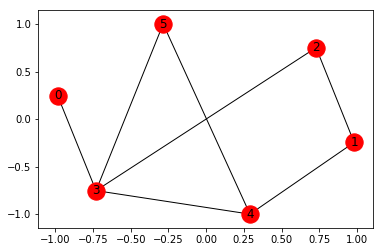

Removed 2, 4
(2, 4), S = (3,)
[[0.31916436]]
(3, 0), S = (2,)
[[0.80660767]]


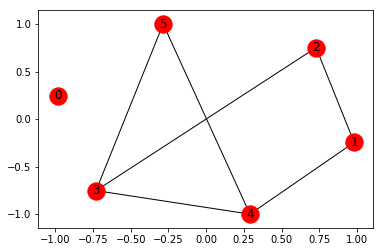

Removed 3, 0
(3, 0), S = (4,)
[[0.49293771]]
(3, 0), S = (5,)
[[0.43853482]]
(3, 2), S = (4,)
[[0.52695305]]
(3, 2), S = (5,)
[[0.41299247]]
(3, 4), S = (2,)
[[0.38224133]]
(3, 4), S = (5,)
[[0.54418663]]
(3, 5), S = (2,)
[[0.85360831]]


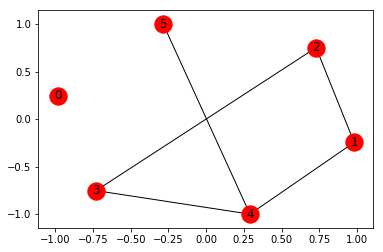

Removed 3, 5
(3, 5), S = (4,)
[[0.55757999]]
(4, 1), S = (3,)
[[0.09687233]]
(4, 1), S = (5,)
[[0.59581871]]
(4, 3), S = (1,)
[[0.24289345]]
(4, 3), S = (5,)
[[0.87312218]]


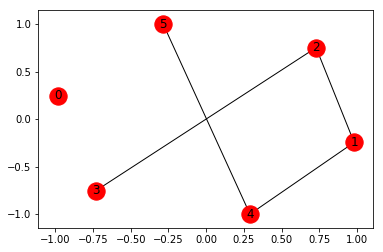

Removed 4, 3
(4, 5), S = (1,)
[[0.95977059]]


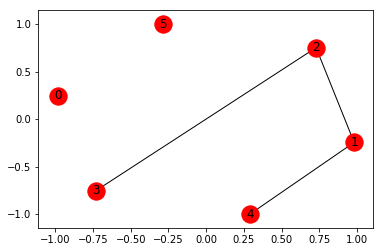

Removed 4, 5


In [62]:
import numpy as np
import pandas as pd
import csv
from itertools import combinations, permutations
import networkx as nx
import matplotlib.pyplot as plt

# Nodes of the graph
nodes = range(6)
l = -1

# Creating the full undirected graph to start with:
Graph = nx.Graph()
Graph.add_nodes_from(nodes)
for (i, j) in combinations(nodes, 2):
    Graph.add_edge(i, j)
    pass

def test (data, i, j, set):    
    p = np.random.rand(1, 1)
    print(p)
    return p

alpha = 0.8
data = []

pos = nx.spring_layout(Graph)

plt.figure()
nx.draw_networkx(Graph,pos=pos)
plt.show()

while True:
    l = l + 1
    for (i, j) in permutations(nodes, 2):
        adjacents = list(Graph.neighbors(i))
        if j in adjacents:
            adjacents.remove(j)
            if len(adjacents)>=l:
                for S in combinations(adjacents, l):
                    print("(%d, %d), S = %s" %(i, j, str(S)))
                    p_val = test(data, i, j, S)
                    if p_val > alpha:
                        Graph.remove_edge(i, j)
                        plt.figure()
                        nx.draw_networkx(Graph,pos=pos)
                        plt.show()
                        print("Removed %d, %d" %(i, j))
    if l == 5:
        break
        
        


In [64]:
import numpy as np
from fcit import fcit

# Generate some data such that x is indpendent of y given z.
n_samples = 1000
z = np.random.dirichlet(alpha=np.ones(2), size=n_samples)
x = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)
y = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)

# Check that x and y are dependent (p-value should be uniform on [0, 1]).
pval_d = fcit.test(x, y)
# Check that z d-separates x and y (the p-value should be small).
pval_i = fcit.test(x, y, z)

ModuleNotFoundError: No module named 'fcit'

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression

dag_data = np.genfromtxt('dag.csv', delimiter=',')
data = dag_data[1:,:]
x = 1
y = 2
set = [3]

data_x = data[:, x]
data_y = data[:, y]
j = 0
data_z = np.zeros([len(data_x), len(set)])
for i in set:
    data_z[:, j] = data[:, i]
    j += 1


In [168]:
reg = LinearRegression().fit(data_z.reshape(-1, 1), data_x)
pred_x = reg.predict(data_z)
residual_x = pred_x - data_x

reg = LinearRegression().fit(data_z.reshape(-1, 1), data_y)
pred_y = reg.predict(data_z)
residual_y = data_y - pred_y

In [157]:


test(dag_data, 0, 1, [1])

ValueError: Expected 2D array, got 1D array instead:
array=[-1.49454989e+00 -2.29499794e+00 -2.30000844e+00  2.03651014e+00
 -1.79460718e+00  2.07675389e+00 -1.20662913e+00 -2.32542423e+00
  1.39212134e+00 -2.22675639e+00  1.78707989e+00 -1.80160920e+00
 -2.89761691e+00  2.07843960e+00  2.56856025e+00 -1.67224512e+00
  2.18252644e+00  2.64514338e+00  1.70188667e+00 -2.23390217e+00
  3.80289668e-01  2.35789028e+00  1.19482004e+00  2.82325189e+00
  1.09152953e+00 -2.14320479e+00  7.70935695e-02 -1.88378392e+00
 -3.82433148e-01  1.57407105e+00 -1.59892572e+00  7.77855243e-01
 -2.93671093e+00 -2.31637043e-01 -2.77567944e+00 -2.37511420e+00
 -1.85506696e+00  2.88733515e+00 -1.68593462e+00 -1.85165246e+00
  2.87885155e+00  2.87443599e+00 -4.54368646e-01  2.23998272e+00
 -8.20527220e-01 -2.52918675e+00 -9.45949352e-01 -2.93361916e+00
  2.11129365e+00 -1.02171149e+00  1.81316235e+00 -2.39928250e+00
  2.23265014e+00  2.76222054e+00 -1.53842906e+00  7.37583801e-02
 -3.76623919e-01  1.02690503e+00  2.46026590e+00 -2.07579406e-01
  2.19331391e+00  1.50433055e+00  2.07883677e+00 -1.94918264e+00
  1.68777752e+00 -1.15575978e+00  2.76092155e-01 -2.64295824e+00
  1.60773375e+00  1.92500248e+00  9.28032751e-01 -2.61231681e-01
 -2.60768447e+00  1.30909549e+00 -2.14296988e+00  7.50494257e-01
 -2.36790873e-01 -2.79302628e+00 -1.79514197e+00  5.66644158e-01
  7.94837171e-01 -1.37457434e+00 -1.98996574e+00  1.34580113e+00
  2.17117679e+00 -2.68253849e+00 -2.59881813e+00  1.02218255e+00
  2.53618569e+00 -1.86803918e+00 -1.90352512e+00  1.77903165e+00
 -2.43024429e+00  9.46783231e-01  2.71090639e+00  8.59790303e-01
  1.50204198e+00  1.38895804e+00  2.90853412e-01  2.19814883e+00
  2.87689651e+00 -2.16327954e+00 -2.90204481e+00  6.61636560e-01
 -1.32588761e+00 -5.57809736e-01 -1.13367653e+00  7.36951523e-01
 -1.43681835e+00 -2.90848022e+00  2.04447965e+00  1.09278154e+00
 -2.80158293e+00 -3.00107227e-01  5.76424151e-01 -9.37744468e-01
 -1.99659138e+00 -1.82655533e+00 -1.16437657e+00  2.45438393e+00
 -2.94075209e+00 -2.80410747e+00 -2.98448619e+00 -1.10437134e+00
 -8.50770810e-01  5.72502373e-01  2.15062653e+00 -8.70934047e-01
 -8.10476874e-01 -2.06217232e+00  1.44533112e+00 -2.30100201e+00
 -2.00419841e+00  1.93405119e+00  2.28909127e-01 -7.06171651e-01
  1.38161067e+00  1.57984209e+00  5.41058252e-02  2.65962629e+00
 -7.79046372e-01  1.21560916e+00 -1.58274575e+00 -5.96677639e-01
  1.30571211e+00  1.00523774e+00  2.46114005e+00 -1.08616887e+00
  2.65565902e-01 -2.76352030e+00 -3.08160254e-01 -1.27677320e+00
  2.25537276e+00 -2.88880209e+00 -2.98146390e+00 -1.08145755e+00
  7.97377189e-02 -1.53543311e+00 -3.21628231e-01 -1.21650083e+00
  1.86443878e+00 -2.29241548e+00 -1.71243832e+00  1.30887373e+00
  8.40141982e-01 -9.33795606e-01 -1.85512602e+00 -4.66584800e-01
 -2.23509065e+00 -1.97919100e+00  2.73828625e+00 -2.47629992e-02
  2.61374718e-01  6.05628796e-01 -1.42249195e+00 -1.49676016e+00
  2.04355835e+00  6.23407691e-01  1.62021568e-01  1.05894133e+00
  9.91136342e-01 -4.46194686e-01  1.21971509e+00  1.15394652e+00
 -6.07013566e-01 -1.77927077e-01 -1.44938683e-01 -1.58408090e+00
 -8.25742946e-01  2.62714224e+00 -2.97851370e-01  1.01580775e+00
 -1.11216388e+00 -6.46222229e-01  1.12077358e+00  1.16517147e+00
 -1.00450800e+00 -1.89922631e+00  1.28536351e+00 -2.43974405e+00
 -1.27912838e-01  1.22570023e-01 -5.00864916e-01 -8.06851136e-02
 -1.56203554e+00  2.48162466e+00 -6.81596262e-01  9.17142534e-01
 -5.83365863e-01  9.36379029e-01 -6.16171750e-01  2.47861855e+00
 -2.24526211e+00  8.11020212e-01 -1.86104876e-01  1.11168455e+00
  1.06594859e+00 -2.20234650e-01 -1.37882625e+00  2.61808167e+00
  1.43322195e-01 -2.45436953e+00 -1.87507899e+00 -1.24738865e+00
  1.16054321e+00  2.97806658e+00 -2.40434020e+00 -2.97671208e+00
  9.95054792e-01  1.86304978e+00  6.63769673e-01  2.55873554e+00
 -1.79580285e+00 -1.65604470e+00  3.28789550e-01  1.60677750e+00
  8.53037840e-02 -5.87679778e-01  2.47542568e+00 -4.74417962e-01
 -2.84793669e+00 -1.90044786e+00 -1.99521179e+00  1.89332840e-01
 -2.62712932e+00  8.93229158e-01  2.95679981e+00  1.33327929e+00
 -1.98958798e+00 -8.31269500e-01 -6.59859571e-01  4.61618616e-01
  1.27664903e+00 -8.54157833e-02 -2.53974653e-02  2.31191374e+00
 -2.20189724e+00  1.96487726e+00  2.03265651e+00 -2.30746923e+00
 -2.89730555e+00  1.90015542e+00 -1.95884098e+00 -2.86185155e-01
 -1.23377028e+00 -2.68925018e+00 -2.51430526e+00  1.22126388e+00
 -2.12520850e+00  2.42854549e+00 -2.92885065e+00 -2.48910221e-01
  2.28572298e+00  9.83089038e-01  1.98458511e+00 -4.94103705e-01
  1.92203365e-01 -2.33760055e+00  2.26053835e+00  2.64282615e+00
 -6.53664715e-01  1.17642164e+00  1.46691712e+00 -1.87119483e+00
  9.44521065e-01  2.88520140e+00 -1.82047553e+00  2.96882026e-02
 -1.30563148e+00 -1.71835903e+00 -1.82572204e+00  9.46357629e-01
 -7.43999798e-01 -1.38824836e+00  7.53585076e-01 -9.62274816e-01
  4.91303040e-01 -7.39064815e-01 -6.71193111e-01 -1.23972682e+00
  1.83793638e+00 -9.78330045e-01 -2.08885269e+00  2.73840574e-03
  2.35713096e+00 -2.90468260e+00 -1.95688488e+00 -2.95664596e+00
 -2.07090838e+00  1.88098635e+00  1.48576241e+00  2.79386829e+00
 -2.30264129e+00 -2.08597847e+00 -8.32787659e-01  2.17069840e+00
 -8.70445410e-01  2.78571049e+00 -1.61351969e+00  6.17618059e-01
 -1.41279981e+00 -2.65760172e+00  1.45661228e+00  2.74644871e+00
  1.31360620e+00 -2.04744545e+00  6.52958198e-01  5.77161063e-01
  1.13210812e+00 -2.12260413e+00  2.21290879e+00  9.04252665e-01
 -9.47837658e-01  1.31241475e+00  1.35534869e+00  9.36131868e-01
  2.10389944e+00  2.65309343e+00 -5.50559121e-01 -4.48516595e-01
 -8.77634920e-01  2.58152650e+00  2.97781470e+00  1.75678380e+00
 -1.18854228e-01  1.44697106e+00  2.79280336e+00  5.78996490e-01
 -2.93425596e+00 -1.75631432e+00 -1.04105328e-01 -4.32130399e-02
  2.63328285e-01  2.24490491e+00  1.53658812e+00  1.65152981e+00
 -2.04494721e+00  2.84444516e+00 -2.72924856e+00  1.78387837e+00
 -9.53254136e-02 -1.74844247e+00  1.25451877e+00  2.68833459e+00
 -6.44551355e-02  1.68247379e+00 -2.69904761e-01  1.68099931e+00
 -1.52307087e+00  1.14587335e+00  8.96137791e-01 -1.78813741e+00
 -1.34129998e-01 -7.21469686e-01 -8.74757029e-01  3.68742056e-01
 -1.52093370e+00 -2.09753503e-01 -2.77624882e+00  8.46033964e-01
  4.15552271e-01 -2.40703642e+00 -2.25230957e+00  2.95838270e+00
  1.25639199e+00  2.93238256e-01 -2.21140801e+00  1.12248493e+00
  1.43504649e+00  1.10123200e+00  3.85893573e-02 -3.77282135e-01
 -1.82393956e+00  2.02942904e-01  2.53370695e+00 -1.82554677e+00
  3.44135919e-01  2.56998652e+00  5.25858230e-03  1.08752424e+00
 -1.60018933e+00  2.27165317e+00 -1.33517394e+00  2.55733791e+00
 -3.74261457e-01 -1.51328738e+00  6.64115974e-02  1.71750720e+00
 -1.26467025e+00 -1.31640808e+00 -3.52286671e-02 -7.25545897e-01
 -2.83100022e+00  2.71922408e+00  9.38878683e-01 -2.68348930e+00
 -1.09703679e-01  1.97082334e-01 -6.83979000e-01  6.72914082e-01
  1.31606949e+00  1.51374801e+00 -2.22202798e+00 -1.13788594e+00
 -1.75956005e+00 -1.83598675e+00  1.24498447e+00 -1.70264642e+00
  1.21887501e+00  2.63366812e+00 -1.55670332e-01  2.54074693e+00
  2.65130051e+00 -1.86453113e+00  2.11543406e+00 -1.99714383e+00
 -9.78373880e-02  2.97184326e-01 -2.22071296e+00 -1.95435214e+00
 -1.03326541e+00 -1.97366482e+00 -2.51148400e+00 -2.64119996e+00
 -2.20055100e+00  1.88105099e+00 -5.56595446e-01 -1.06751540e+00
  8.46447777e-01 -1.07967407e+00 -2.41801725e+00 -1.31442701e+00
 -1.97745715e+00 -4.90989518e-01  1.67063375e+00  2.53311857e+00
 -9.50967853e-01  9.70400042e-01 -2.17823840e+00 -6.73096248e-01
  1.23484174e+00  1.90561016e+00  5.83286439e-01 -2.93638535e+00
  1.16497661e+00  4.45746536e-02 -2.02274861e+00 -2.42271131e+00
 -3.34962367e-01  6.95083028e-01 -2.08085979e+00 -7.96753966e-01
  1.44011238e+00  1.43483893e+00 -1.97084489e+00  2.16891867e+00
  3.92659859e-01 -1.11590085e+00  2.99725827e-01  1.88641801e+00
 -5.50820949e-01  1.09959551e+00 -1.91710427e+00 -3.24976614e-01
  2.37939804e+00  2.50017694e+00  4.45884028e-01 -2.08234001e+00
  6.11761740e-01  2.81210744e+00  4.20313064e-01 -2.84774297e+00
 -2.53131536e+00 -1.16373865e+00  2.29409835e+00  2.85587621e+00
 -1.69849919e+00 -1.99829501e+00  9.52516889e-01 -1.05588007e+00
 -2.01363717e+00 -7.70348721e-01  2.92865570e+00 -1.94806801e+00
  1.50669190e-01  2.65603847e+00  1.50978428e+00 -1.15768656e+00
 -7.47859379e-02  2.66989680e+00  1.70523427e+00  2.97129999e+00
 -2.38237269e+00  1.20727881e+00 -1.19474723e+00 -5.11385960e-01
 -2.88717650e+00 -2.77372001e+00 -8.93192464e-01 -5.50612093e-01
 -2.93279844e-01 -2.73858271e+00 -2.69031927e+00  2.33981934e+00
  1.33625291e+00 -2.52968676e+00 -6.92665367e-02 -1.82792971e+00
  2.75181434e+00  1.22891796e+00 -2.76467446e+00 -2.77601755e+00
 -1.54244570e+00 -2.73940541e+00  4.16230229e-01  5.57326147e-01
 -4.67508135e-01  2.97384616e-01  1.89556459e+00 -9.00644869e-01
 -1.25513343e+00  1.54747926e+00  1.40775570e+00 -9.53319023e-01
 -2.20419612e+00  3.97570459e-02 -2.14909248e+00  4.20345863e-01
 -2.48606830e+00 -4.84561600e-01  4.52609117e-01  1.35361322e+00
  2.92237748e+00 -1.53286655e+00  1.99459952e+00  4.10730266e-01
  8.81293384e-01  7.54359679e-01  1.34126909e+00 -1.22028260e+00
 -1.21489750e+00  7.35700774e-01  1.99923715e+00  1.79030480e+00
  2.64067680e+00  9.91609114e-01  2.17656700e-01  1.93344711e+00
  2.77846216e+00  7.39228319e-02 -1.41806257e+00  1.43523928e+00
 -5.96571871e-01  8.92551456e-01  1.43237865e+00 -1.13332807e-01
  6.69994401e-01 -2.97197161e+00 -1.68223473e+00 -2.64373810e+00
 -6.28791780e-01  2.66871545e+00  2.18834101e+00  8.45763497e-01
  1.73092876e+00  2.78353350e+00 -2.22313139e+00  7.97129884e-01
 -2.90391627e+00  1.62007645e+00 -2.56980633e+00 -2.54681207e+00
  2.40997291e+00  1.76773396e+00 -2.44504711e+00 -2.17708827e+00
  2.27035429e+00  2.58363017e+00  2.76467819e+00 -5.46611781e-01
 -2.28878741e+00  2.65972892e+00  2.72482613e+00 -6.23150603e-01
 -1.79435641e+00 -6.99633595e-01 -1.44983362e+00  2.09926581e+00
 -1.00565631e+00  2.49356570e+00  1.08332278e+00 -6.35196038e-01
  2.51395290e+00  2.10048928e+00 -2.39579525e+00  2.14916783e-01
  2.51525156e+00 -5.64255901e-01 -1.71141948e+00  4.14902704e-02
 -8.21590240e-01  2.75819579e-01 -1.86123401e+00 -5.72707140e-01
 -2.88323576e+00 -1.65995304e+00  1.58278885e+00 -9.78901001e-01
  2.23659572e+00  1.56608989e+00 -2.38166617e+00 -7.17519556e-02
  2.65567428e+00  2.67551241e+00 -4.89879671e-01 -3.63096404e-01
  5.28288891e-01  2.72549809e+00 -4.85375585e-01  3.34746779e-02
  2.63263298e+00 -1.25969441e+00  6.00942023e-02  2.10080363e+00
 -5.01885821e-01  6.66181259e-01 -2.42892898e+00  2.94537562e-01
  2.09769812e+00 -1.43532364e-01  5.02907389e-01  4.11154219e-01
  1.16850951e+00  4.99279173e-01  7.06262296e-01 -4.00629225e-01
  1.45897880e+00  1.42733674e+00 -1.75329190e+00  2.10173824e+00
 -1.14111176e+00 -7.75063691e-01  1.32284689e+00  1.29106625e-01
  2.32472942e+00  9.55811351e-01 -9.31280917e-01 -2.11933450e+00
 -8.74186505e-01 -2.72999632e+00  5.80609301e-01 -2.11628447e+00
  2.24147149e+00  2.11023157e+00 -5.81951139e-01 -9.36959618e-01
  1.71009819e+00 -2.87328799e+00 -9.36402582e-01 -2.17095391e+00
 -2.44246058e+00  1.59421779e+00  8.55751371e-01 -2.68036103e+00
 -1.43883328e+00  7.15195645e-01 -1.44916086e+00 -1.00838449e+00
  2.97646440e+00  2.55461203e+00  1.19958628e+00 -1.21221166e+00
 -2.16861367e+00 -1.25189903e+00 -2.08890706e-01  1.65815476e+00
 -3.98221762e-01  1.67346578e+00  2.23747822e-01  2.02690311e+00
  2.85417931e+00 -2.92686747e+00  1.62485432e+00  4.14264067e-02
 -1.52625378e-01 -1.23356329e+00  1.31144773e+00  1.57129763e+00
 -2.64951037e+00 -1.89036706e+00 -1.86893132e+00 -2.43805903e-01
  1.36016255e+00  1.46779695e+00  2.68683680e-01 -1.12952368e+00
  1.89428471e+00  2.01512143e+00 -2.46620351e+00 -1.85377118e-01
 -1.77640537e+00  1.16827537e+00 -1.90814587e+00  1.90438792e+00
  1.73756586e+00  2.33939838e-01  2.29352741e+00  1.15606033e-01
  2.50875676e+00 -8.44487405e-01  2.77123531e+00  2.75814787e+00
  1.47684831e+00 -9.63890754e-01  1.67513471e+00 -1.46868689e+00
 -2.14592414e+00  1.27082947e+00 -5.97953973e-01 -4.14888514e-01
  2.36830831e+00  2.11879472e+00  1.33526993e+00  2.57886922e+00
  1.27081034e+00 -2.71704910e+00  7.52434417e-01 -1.88808883e+00
  8.29303168e-01  1.98046179e+00 -1.51419651e+00 -1.41094842e+00
  1.02311891e+00  1.89850955e-01 -5.91656326e-02 -1.49061272e+00
  6.94035856e-01 -8.67375035e-01 -2.35767199e+00  2.65855924e-01
  7.64313099e-03  1.62041218e+00 -2.16272687e+00  1.10720809e+00
  8.66717355e-01 -1.11397103e-01 -1.83691467e+00 -2.61347154e+00
  2.53152549e+00 -2.38414694e+00  8.97761722e-01  2.58038806e+00
 -2.94694470e+00 -9.77781349e-01 -2.50844756e+00  1.13875816e+00
  2.27982833e+00 -2.92986494e+00 -1.30304653e+00  2.83873255e+00
 -2.16118145e+00 -1.93157975e+00 -2.80873450e+00  1.86806372e+00
  2.38045040e-01  7.80523572e-01 -1.50412553e+00  7.33097489e-01
  4.74542169e-01 -1.55706997e+00 -2.77618031e+00 -1.22254782e+00
  2.57032109e+00 -2.24277636e+00  1.70348117e+00 -2.88142771e+00
 -2.06974064e+00  3.47223032e-01  2.61085722e+00 -2.49996061e+00
  3.70427098e-01  2.70280766e+00  2.97815337e+00 -1.41341542e+00
 -1.09367133e+00 -2.22123291e+00 -2.06386671e+00  6.79826373e-01
  1.12706160e+00 -9.53808934e-01  1.45925964e+00 -1.67497518e+00
 -1.38214026e+00  1.42248873e-01  1.44657548e+00 -2.68885788e+00
 -1.59580860e+00 -1.49241886e+00  2.00211141e+00 -4.57837925e-01
 -1.05600998e+00  1.26890568e+00 -1.02312533e+00 -2.06680809e+00
  3.16705937e-01  2.02527546e+00  2.95899780e+00  3.86612662e-01
  2.41681555e-01 -3.31378563e-01 -9.33559262e-01 -1.61217509e+00
 -6.27186183e-01 -1.97479469e+00 -3.11577886e-01 -1.39336430e+00
 -4.76956246e-01  2.48852524e-01  2.49529570e-01  2.70502676e+00
 -2.17325121e+00  2.90695386e+00  3.57005465e-01 -2.93317152e+00
 -3.58727037e-02  1.09018872e+00 -6.92290106e-01  5.40009372e-01
  2.12955532e-01  1.66505755e+00 -2.59369704e+00 -2.32992577e+00
 -7.44984818e-01 -2.50834789e+00 -1.54263058e+00  2.65696187e+00
 -1.89041664e+00 -3.29998492e-01  1.44435716e+00 -9.74202153e-01
  1.21767331e+00  2.31907758e+00  2.74434361e+00  2.36538787e+00
 -2.35534485e+00 -9.75776750e-01  4.51958238e-01 -1.22893688e+00
  5.99142738e-01 -2.58341026e+00  8.80473942e-01  2.27440321e+00
  1.54120193e+00  1.68531502e+00  4.46790512e-01 -2.22107187e+00
 -2.07114570e+00  1.04203618e+00  1.51332759e+00 -1.37725380e+00
 -4.63460333e-01 -1.03797460e+00 -2.05452840e+00 -1.41954068e+00
  2.93567153e+00 -2.20046947e-01 -1.89631502e+00 -5.30500714e-01
  1.08637021e+00  1.43251881e+00 -2.81194742e+00 -7.87986597e-01
  1.33581459e+00 -2.16864369e+00 -7.77642103e-02 -2.90722887e+00
 -1.48926115e+00  3.93619936e-01 -2.80656745e+00 -8.52911963e-01
  2.90045788e+00  4.43125359e-01 -2.33670690e+00 -1.20050589e+00
 -1.65227508e+00 -2.39096570e-01  2.17747298e+00  1.46208905e+00
 -5.84515320e-01  1.19057680e+00 -1.26310747e+00 -2.09628090e-01
 -2.99298804e+00 -1.61316034e+00 -9.19377215e-01 -5.22668985e-01
  2.23451844e+00 -7.80169161e-01 -3.79576024e-01 -3.86457345e-01
 -5.78339280e-03  2.91957238e+00  1.83301028e+00 -1.50956061e+00
  2.36315678e+00  2.13111705e+00  4.98037250e-01 -1.98090448e+00
  2.98434070e-01 -2.69035351e-01  1.89746097e+00 -2.79730188e+00
 -2.62837279e+00 -7.31538406e-01  2.60196162e+00 -2.13447309e+00
  9.04666926e-01  5.42668736e-01 -1.06914828e+00 -6.03147691e-01
  2.83396753e+00 -1.96314686e+00 -1.79955452e+00 -1.36922981e+00
  1.41087365e+00 -4.70537752e-01  1.69735424e+00  1.61526759e+00
  7.81091020e-01  1.02865524e+00 -2.87730125e+00  1.51144314e+00
  2.51984014e-01 -2.05462956e+00 -2.07496307e+00  2.39828960e+00
  5.08348622e-01 -7.38812011e-01  2.80190619e-01  8.61499743e-01
  2.40371542e+00 -2.53609881e+00  1.46825982e+00 -2.31159569e+00
  9.56998158e-01  1.46476165e+00 -1.70660353e+00 -2.76619881e-01
 -7.79852282e-01  2.97142310e+00  1.38821263e+00 -2.72085922e+00
  2.25132314e+00 -3.90396525e-01 -1.65269720e+00  2.00464130e+00
 -2.54417473e+00  1.30651535e+00  1.09802234e+00  2.86369216e+00
  6.49390560e-01  1.12092159e+00 -5.63134629e-01  4.34108313e-02
 -8.68831376e-01  2.33270776e+00  5.43786845e-01 -2.81777102e+00
 -8.21663498e-02  1.65981878e+00  2.76487744e+00 -9.31008134e-01
 -9.00303908e-02 -2.92311816e+00  7.77303348e-01  1.51288644e+00
  2.91874575e+00 -2.87112025e-01  2.42873464e+00 -9.41819698e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.